# Problem 2

Use this notebook to write your code for problem 2. You may reuse your SGD code from last week.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The following function may be useful for loading the necessary data.

In [2]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: given as a string.
        
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

In [3]:
def loss(X, Y, w):
    '''
    Calculate the log loss function (no regularization).
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.
        lambda_value: floating point value
    
    Outputs:
        l: The loss evaluated with respect to X, Y, w, and lambda
    '''
    
    l = 0
    for i in range(len(X)):
        l += np.log(1 + np.exp(-Y[i] * np.dot(w, X[i])))
    return l

def gradient(x, y, w, lambda_value, N):
    '''
    Calculate the gradient of the loss function with respect to
    a single point (x, y), and using weight vector w.
    
    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.
        
    Output:
        g: The gradient of the loss with respect to x, y, and w. 
    '''
    
    regularization_term = (2 * lambda_value * np.array(w)) / N
    non_regularization_term = -(1 - 1 / (1 + (np.exp(-y * np.dot(w, x))))) * y * x
    g = regularization_term + non_regularization_term
    
    return g   
    
def SGD(X, Y, w_start, eta, N_epochs, lambda_value):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.
        
    Outputs:
        W: A (N_epochs, D) shaped array containing the weight vectors from all iterations.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    '''
    W = w_start
    for i in range(N_epochs):
        indices = list(range(len(X)))
        shuffled_indices = np.random.permutation(indices)
        
        for j in range(len(X)):  
            index = shuffled_indices[j]
            W = W - (eta * gradient(X[index], Y[index], W, lambda_value, len(X)))
    return W
    

In [4]:
# This function normalizes the data set

def normalization(data):
    rows = len(data)
    columns = len(data[0])
    means = []
    standard_deviations = []
    for i in range(1, columns):
        summation1 = 0
        summation2 = 0
        for j in range(rows):
            summation1 += data[j][i]
        mean = summation1 / rows
        for j in range(rows):
            summation2 += (mean - data[j][i]) ** 2
        standard_deviation = (summation2 / rows) ** (0.5)
        for j in range(rows):
            data[j][i] = (data[j][i] - mean)/standard_deviation
        means.append(mean)
        standard_deviations.append(standard_deviation)
    return data, means, standard_deviations


In [5]:
import random

def plotting_helper_function(X, Y, X_test, Y_test):
    
    # Create a list of the lambda values for regularization
    lambda_values = [0.00001]
    for i in range(14):
        lambda_values.append(lambda_values[i]*5)

    # Initialize the parameters
    N_epochs = 20000
    eta = 5e-4
    E_in = []
    E_out = []
    norms = []
    for j in range(len(lambda_values)):
        lambda_value = lambda_values[j]
        weights = []
        for i in range(14):
            weights.append(random.uniform(0.001, 0.01))
        W = SGD(X, Y, weights, eta, N_epochs, lambda_value)
        e_in = loss(X, Y, W)
        e_out = loss(X_test, Y_test, W)
        norm = (np.dot(W, W)) ** (0.5)
        E_in.append(e_in / len(X))
        E_out.append(e_out / len(X_test))
        norms.append(norm)

    return lambda_values, E_in, E_out, norms
    

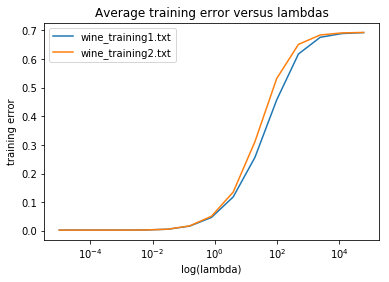

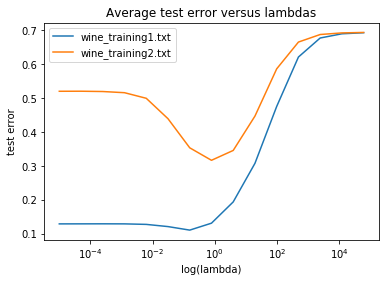

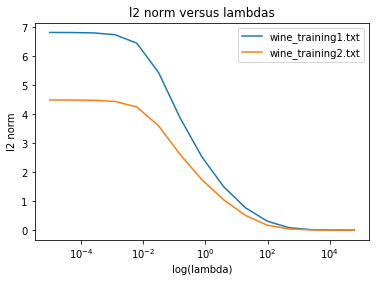

In [6]:
# Train on the first training data set

training_data1 = load_data("data/wine_training1.txt")
training_data1, means1, standard_deviations1 = normalization(training_data1)
X1 = []
Y1 = []
for i in range(len(training_data1)):
    x = training_data1[i][-13:]
    new_x = np.insert(x, 0, 1)
    X1.append(new_x)
    Y1.append(training_data1[i][0])
     
# Train on the second training data set

training_data2 = load_data("data/wine_training2.txt")
training_data2, means2, standard_deviations2 = normalization(training_data2)
X2 = []
Y2 = []
for i in range(len(training_data2)):
    x = training_data2[i][-13:]
    new_x = np.insert(x, 0, 1)
    X2.append(new_x)
    Y2.append(training_data2[i][0])
    
# Normalize the test data with the mean and standard deviation from training data 1
testing_data1 = load_data("data/wine_testing.txt")

# Normalize the test data with the mean and standard deviation from training data 2
testing_data2 = load_data("data/wine_testing.txt")

rows = len(testing_data1)
columns = len(testing_data1[0])
for i in range(1, columns):
    for j in range(rows):
        testing_data1[j][i] = (testing_data1[j][i] - means1[i - 1])/standard_deviations1[i - 1]
        testing_data2[j][i] = (testing_data2[j][i] - means2[i - 1])/standard_deviations2[i - 1]

X_test1 = []
Y_test1 = []
X_test2 = []
Y_test2 = []

for i in range(len(testing_data1)):
    x1 = testing_data1[i][-13:]
    new_x1 = np.insert(x1, 0, 1)
    x2 = testing_data2[i][-13:]
    new_x2 = np.insert(x2, 0, 1)
    X_test1.append(new_x1)
    Y_test1.append(testing_data1[i][0])
    X_test2.append(new_x2)
    Y_test2.append(testing_data2[i][0])
    
lambda_values1, E_in1, E_out1, norm1 = plotting_helper_function(X1, Y1, X_test1, Y_test1) 
lambda_values2, E_in2, E_out2, norm2 = plotting_helper_function(X2, Y2, X_test2, Y_test2)

# Plot the average training error versus different lambdas for the different training data sets

plt.plot(lambda_values1, E_in1, label = "wine_training1.txt")
plt.plot(lambda_values2, E_in2, label = "wine_training2.txt")
plt.title("Average training error versus lambdas")
plt.xlabel("log(lambda)")
plt.ylabel("training error")
plt.xscale('log')
plt.legend()
plt.show()
    
# Plot the average test error versus different lambdas for the different training data sets

plt.plot(lambda_values1, E_out1, label = "wine_training1.txt")
plt.plot(lambda_values2, E_out2, label = "wine_training2.txt")
plt.title("Average test error versus lambdas")
plt.xlabel("log(lambda)")
plt.ylabel("test error")
plt.xscale('log')
plt.legend()
plt.show()

# Plot the l2 norm versus different lambdas for the different training data sets

plt.plot(lambda_values1, norm1, label = "wine_training1.txt")
plt.plot(lambda_values2, norm2, label = "wine_training2.txt")
plt.title("l2 norm versus lambdas")
plt.xlabel("log(lambda)")
plt.ylabel("l2 norm")
plt.xscale('log')
plt.legend()
plt.show()